# Python pour les scientifiques

## Pourquoi ?

* Grand spectre d'applications :calcul scientifique, web, bases de données, jeu vidéo, graphisme, *etc*,
* Multi plateformes: Windows, Mac OS, Linux, Unix, Android ...
* Open Source,
* Ecosystème très fourni: outils de documentation, diffusion, démonstration, présentations...
* Communauté très vivante

## Comment ?

* Python = intepréteur
* Environnements: Spyder, Anaconda, Ipython,
* IPython: terminal interactif & notebook,
* Documentation: Sphinx,
* Collaboratif / Versionnage: Git, ...


## Outils complets
* Python (x,y), 
* Anaconda,
* Canopy / EPD,


## Premiers pas


In [80]:
print "Ca marche !"

Ca marche !


In [81]:
# Python: une grosse calculatice ?
2 + 2
print a

[[1 2]
 [3 4]
 [5 6]]


In [82]:
3 == 4 


False

In [83]:
a = 12 # Déclarer une variable
print "a=", a
a = "tutu" # Typage dynamique
print "a=", a


a= 12
a= tutu


## Structures basiques

In [84]:
n = 1 # Entier (32 bits)
type(n) 

int

In [85]:
a = 5. # Flottant (64 bits)
type(a)

float

In [86]:
l = [1,2,3] # Une liste
print l[0]

1


In [87]:
l.append("tutu")
print l

[1, 2, 3, 'tutu']


### Fonctions

In [88]:
def ma_fonction(x, a = 1., b = 0.):
  """
  Puissante fonction:
  
  * x: variable.
  * a, b: paramètres optionnels
  """
  
  return a * (x + b)

ma_fonction(2)
# Bloc de code = indentation

2.0

In [89]:
ma_fonction(2, 2, 5)

14

In [90]:
ma_fonction(2., a = 2., b = 5.) # Appel par mots clés

14.0

In [91]:
ma_fonction(2., b = 5.) # Appel par mots clés dans le désordre

7.0

In [92]:
help(ma_fonction) # De la doc !


Help on function ma_fonction in module __main__:

ma_fonction(x, a=1.0, b=0.0)
    Puissante fonction:
    
    * x: variable.
    * a, b: paramètres optionnels



## Structures if, for, ...


In [93]:
for i in xrange(5):
  print i

0
1
2
3
4


In [94]:
for truc in [1, 2, "machin"]:
  print truc

1
2
machin


In [95]:
l = [i**2 for i in xrange(5)]
print l

[0, 1, 4, 9, 16]


In [96]:
a = 2
if a == 2:
  print a  

2


## Calcul numérique avec Numpy 

In [97]:
l = [1,2,3]
l + 2 # Oups, ça ne marche pas ...

TypeError: can only concatenate list (not "int") to list

In [98]:
import numpy as np
l = np.array(l)
2 * l

array([2, 4, 6])

In [99]:
l**2

array([1, 4, 9])

In [100]:
a = np.linspace(0., 10., 11) # Points équirépartis
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [101]:
a = np.array([[1,2],[3,4],[5,6]]) # Array multi dimensionnel
a

array([[1, 2],
       [3, 4],
       [5, 6]])

### Des figures de qualité avec Matplotlib

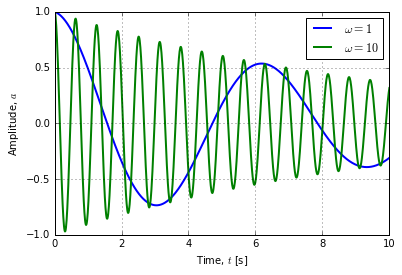

In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def fonc(t, tau = 10., omega = 1., phi = 0. ):
  return np.exp(-t/tau)*np.cos(omega * t + phi)

x = np.linspace(0., 10., 1000)
y1 = fonc(x, omega = 1.)
y2 = fonc(x, omega = 10.)
plt.plot(x,y1, label = "$\omega = 1$", lw = 2.) #Maths inline LaTeX
plt.plot(x,y2, label = "$\omega = 10$", lw = 2.)
plt.legend()
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $a$")
plt.show()

## Et des animations

In [103]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.webm') as f:
            anim.save(f.name, fps=6, extra_args=['-vcodec', 'libvpx'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)


from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [107]:
# -*- coding: utf-8 -*-
"""
Un système solaire...
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class Systeme(object):
  def __init__(self, m, p, v, G = 6.67e-11):
    """
    Syteme solaire en 2D:
    
    * m: masse de chaque objet
    * p: position de chaque objet    
    * v: vitesse de chaque objet
    * G: constance de gravitation universelle
    """
    n = len(p)
    self._n = n
    self.Y = np.zeros([1, 4 * n])
    self.Y[0, :2 * n] = np.array(p).flatten()
    self.Y[0, 2 * n:] = np.array(v).flatten()
    self.m  = np.array(m)
    #self.p  = np.array(p)
    #self.v  = np.array(v)
    self.G  = G
    
      
  
  def derivative(self, y, t):
    """
    Acceleration de chaque masse !
    """      
    m, G = self.m, self.G
    n = len(m)
    p = y[:2 * n ].reshape(n ,2)
    v = y[ 2 * n:].reshape(n ,2)
    a = np.zeros_like(p) # vecteur plein de zeros dans le mm format que p
    n = len(m) # nombre de masses
    for i in xrange(n): # On s'intéresse à la masse i
      for j in xrange(n): # Les masses j agissent dessus   
        if i != j: # i ne doit pas agir sur i !
           PiPj = p[j] - p[i]
           rij = (PiPj**2).sum()**.5
           if rij != 0. :           
             a[i] += G * m[j] * PiPj / rij**3
    y2 = y.copy()
    y2[:2*n ] = v.flatten()
    y2[ 2*n:] = a.flatten()
    return y2       
    
  
  def solve(self, dt, nt):
    time = np.linspace(0., dt, nt + 1)
    Y = odeint( self.derivative, self.Y[-1], time)
    self.Y    = Y
  
  def xy(self):
    n = self._n
    p = self.Y[-1,:2 * n].reshape(n, 2)
    return p[:,0], p[:,1]
    
  def trail(self, i):
    n = self._n
    p = self.Y[:,:2 * n]
    return p[2 * i, :], p[2 * i + 1, : ]
          

G = 1.
nm = 5
m = np.ones(nm)*1.
ms = 100. # Mass of the sun
theta = np.random.rand(nm) * 2. * np.pi
r = np.linspace(.01, 1.5, nm)
v = (G * ms / r)**.5 
v *= np.random.normal(loc = 1., scale = .2, size = nm)
x  =   r * np.cos(theta)
y  =   r * np.sin(theta)
vx = - v * np.sin(theta)
vy =   v * np.cos(theta)
P = np.array([x,   y]).transpose()
V = np.array([vx, vy]).transpose()

# Setting up a sun
m[0]  = ms
P[0] *= 0.
V[0] *= 0.

s = Systeme(m, P, V, G = G)      
dt = 0.005
nt = 100
s.solve(dt, nt)


from matplotlib import animation
fig = plt.figure("Le systeme solaire")
plt.clf()
ax = fig.add_subplot(1,1,1)
plt.xlim(-2., 2.)
plt.ylim(-2., 2.)
plt.grid()
planets, = ax.plot([], [], "or")


def init():
    planets.set_data([], [])
    return planets, 
    
def animate(i):
    s.solve(dt, nt)
    x, y = s.xy()
    planets.set_data(x, y)
    return planets, 

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)


display_animation(anim)       